# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'
validation_file= "./traffic-signs-data/valid.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(y_train)

# Number of validation examples
n_valid = len(y_valid)

# Number of testing examples.
n_test = len(y_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of training examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of training examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

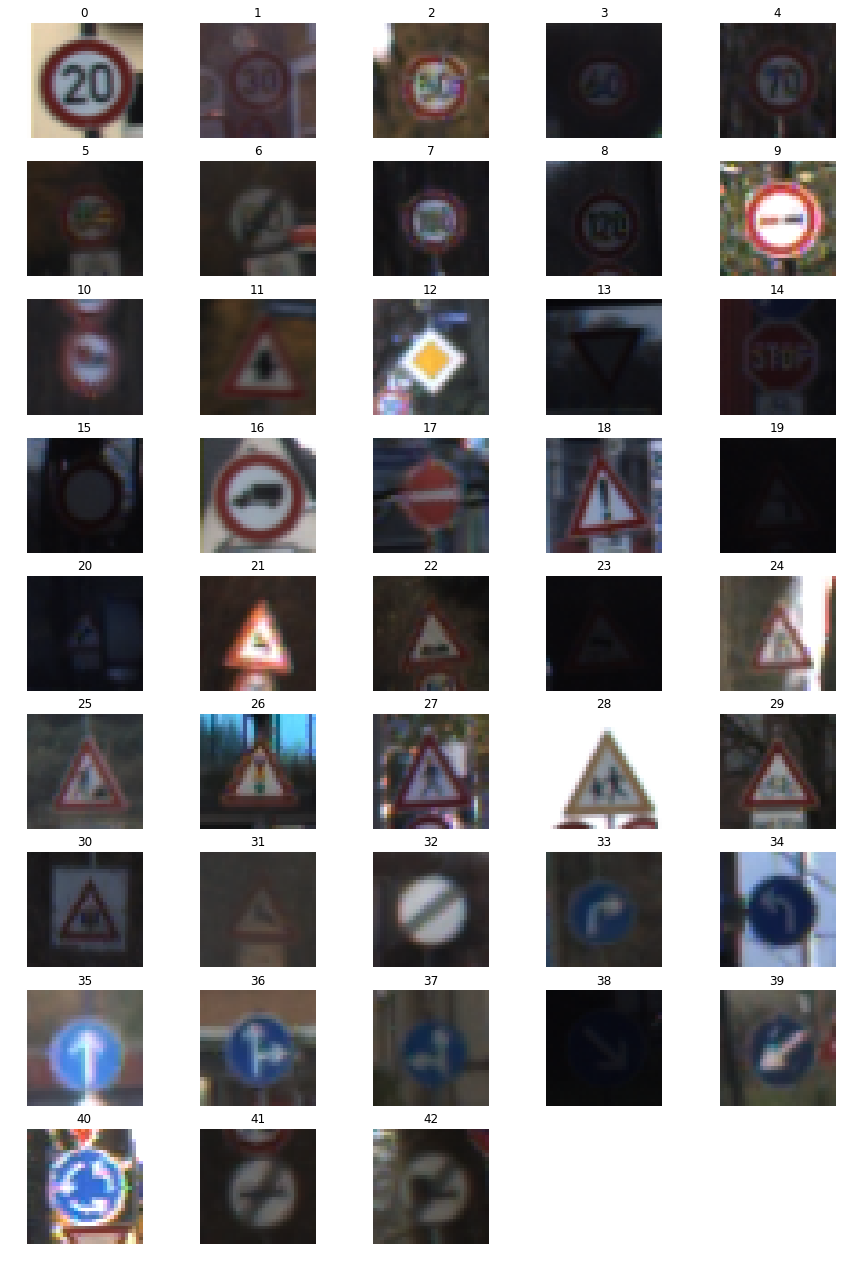

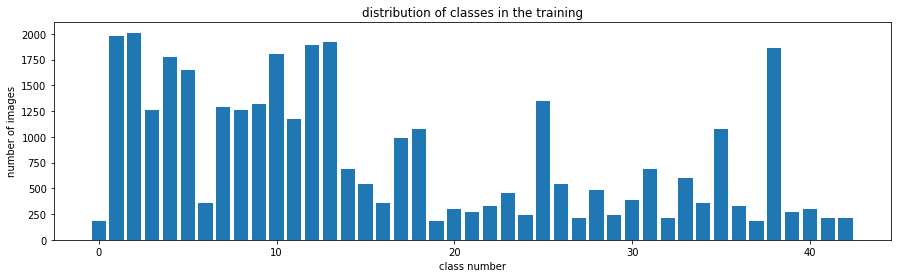

In [3]:
### Data exploration visualization code goes here.

import matplotlib.pyplot as plt
%matplotlib inline

n_selected_image = []
plt.figure(figsize=(15, 25))
for i in range(0, n_classes):
    plt.subplot(10, 5, 1+i)
    selected_image = X_train[i == y_train]
    plt.imshow(selected_image[0, :, :, :]) #draw a first image of the selected one
    plt.title(i)
    plt.axis('off')
    n_selected_image.append(len(selected_image))
plt.show()    

#plot the number of images of each class
plt.figure(figsize = (15, 4))
plt.bar(range(0, n_classes), n_selected_image)
plt.title("distribution of classes in the training")
plt.xlabel("class number")
plt.ylabel("number of images")
plt.show()  

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test the model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 

### Pre-process the Data Set (normalization, grayscale, etc.)

First, image data is changed from RGB image to grayscale so that the number of the layer can be reduced and quicken the calculation speed.

Second, the image data is normalized so that the data has mean zero and equal variance.

In [4]:
import cv2

# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)


In [5]:
from numpy import newaxis

print('Preprocessing training data...')
print(X_train.shape)

# Iterate through grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]

# Normalize
X_train = normalize(X_train) 

print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape1 = X_train.shape
print("Processed training data shape =", image_shape1)

print('Preprocessing training data...')
print(X_valid.shape)

# Iterate through grayscale
X_valid = preprocess(X_valid)
X_valid = X_valid[..., newaxis]

# Normalize
X_valid = normalize(X_valid) 

print('Finished preprocessing validation data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_valid.shape
print("Processed validation data shape =", image_shape2)

print('Preprocessing testing data...')

# Iterate through grayscale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize(X_test) 

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')

Preprocessing training data...
(34799, 32, 32, 3)
Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 1)
Preprocessing training data...
(4410, 32, 32, 3)
Finished preprocessing validation data.
Processed validation data shape = (4410, 32, 32, 1)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
All data preprocessing complete.


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.


In [6]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

### Model Architecture

My model consisted of the following layers:

1. Input:  32x32x1 grayscale image
2. Convolution 5x5: 1x1 stride, outputs 28x28x6
3. Relu
4. Max pooling: 1x1 stride, outputs 28x28x6
5. Convolution 5x5: 1x1 stride, outputs 24x24x16
6. Relu
7. Max pooling: 2x2 stride, outputs 12x12x16
8. Convolution 3x3: 1x1 stride, outputs 10x10x20
9. Relu
10. Max pooling: 2x2 stride, outputs 5x5x20
11. Fully Connected: Input = 500. Output = 120
12. Relu
13. Dropout : 70% keep
14. Fully Connected. Input = 120. Output = 84.
15. Relu
16. Dropout : 70% keep
17. Fully Connected. Input = 84. Output = 43.

In [7]:
### Define the architecture here.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    # output_height:28 = (input_height:32 - height + 1) /slide:1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))  
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Activation.
    conv1 = tf.nn.relu(conv1)
    
    #Pooling. Input = 28x28x6. Output = 28x28x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
        
    # Layer 2: Convolutional. Input = 28x28x6.Output = 24x24x16.
    # output_height:24 = (input_height:28 - height + 1) /slide:1
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))  
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    #Activation.
    conv2 = tf.nn.relu(conv2)
    
    #Pooling. Input = 24x24x16. Output = 12x12x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # Layer 3: Convolutional. Input = 12x12x16.Output = 10x10x20.
    # output_height:10 = (input_height:12 - height + 1) /slide:1
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 20), mean = mu, stddev = sigma))  
    conv3_b = tf.Variable(tf.zeros(20))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    
    #Activation.
    conv3 = tf.nn.relu(conv3)
    
    #Pooling. Input = 10x10x20. Output = 5x5x20.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Flatten. Input = 5x5x20. Output = 500.
    fc0   = flatten(conv3)
    
    #Layer 4: Fully Connected. Input = 500. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(500, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    #Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b 
    
    #Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout to prevent overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)
                        
    #Layer 6: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
                        
    return logits

## Features and Labels
Train LeNet to classify traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [9]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Parameters

The model was traind with Adam Optimizer.  
Batch size = 128.  
Number of epochs = 15  
Learning rate = 0.001  

#### Hyperparameters
mu = 0  
sigma = 0.1  


In [10]:
from sklearn.utils import shuffle

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.694

EPOCH 2 ...
Validation Accuracy = 0.844

EPOCH 3 ...
Validation Accuracy = 0.871

EPOCH 4 ...
Validation Accuracy = 0.912

EPOCH 5 ...
Validation Accuracy = 0.920

EPOCH 6 ...
Validation Accuracy = 0.930

EPOCH 7 ...
Validation Accuracy = 0.942

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.947

EPOCH 10 ...
Validation Accuracy = 0.942

EPOCH 11 ...
Validation Accuracy = 0.955

EPOCH 12 ...
Validation Accuracy = 0.949

EPOCH 13 ...
Validation Accuracy = 0.944

EPOCH 14 ...
Validation Accuracy = 0.953

EPOCH 15 ...
Validation Accuracy = 0.953

Model saved


### Solution approach

What I tried were folloing:
- change preprocess to add grayscale
- change the number of epoch
- change learning rate
- change the number of dropout from 1 dropout to 2
- change dropout rate
- change batch size
- change the number of convolution layer

### log
#### initial test
grayscale  
normalize  
batch:128   
Epoch:10   
learning rate: 0.001
Number of Dropout: 0
dropout rate:0.7  
conv:2


#### accuracy
1. init test : 0.893
2. change Epoch to 6 : 0.88
3. no preprosessing : 0.85
4. add one dropout with 10 Epoch: 0.921
5. 2 dropout : 0.905
6. one dropout with rate 0.5: 0.917
7. dropout rate 0.6: 0.885
8. dropout rate 0.8: 0.924
9. Epoch 15: 0.91
10. learning rate 0.0005: 0.908
11. Epoch 20 : 0.925
12. conv 3 layer : 0.952
13. Epoch 15: 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [13]:
# Test Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


### Load and Output the Images

In [14]:
#Import traffic signs class names
import csv
import os
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

#Import test images  
import glob
images_resized = []
images = []
image_names = []
for image_path in glob.glob('./downloaded_images/*.jpg'):
    image = plt.imread(image_path)
    image_resized = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    images_resized.append(image_resized)
    name = os.path.basename(image_path)
    name = os.path.splitext(name)[0]
    image_names.append(name)
    
#     image_preprocessed = preprocess_data(image_resized)
#     images.append(image_preprocessed[np.newaxis,...])
print(images_resized[0].shape)
print(image_names)

(32, 32, 3)
['Keep_left', 'Pedestrians', 'Road_work', 'Stop', 'Turn_left_ahead']


In [15]:
# Iterate through grayscale
images = preprocess(images_resized)
images = images[..., newaxis]

# Normalize
images = normalize(images) 

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
test_image_shape = images.shape
print("Processed testing data shape =", test_image_shape)


Finished preprocessing testing data.
Processed testing data shape = (5, 32, 32, 1)


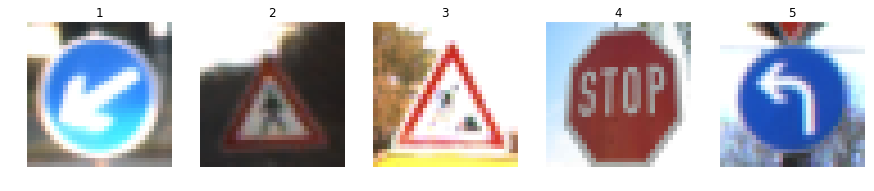

In [16]:
#Visualize new raw images
plt.figure(figsize=(15, 8))
for i in range(len(images_resized)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_resized[i]) 
    plt.title(i+1)
    plt.axis('off')
    n_selected_image.append(len(images_resized))
plt.show()

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import pandas as pd
df = pd.read_csv('signnames.csv')

# Test Model
k = 5
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    out_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: images, keep_prob: 1})

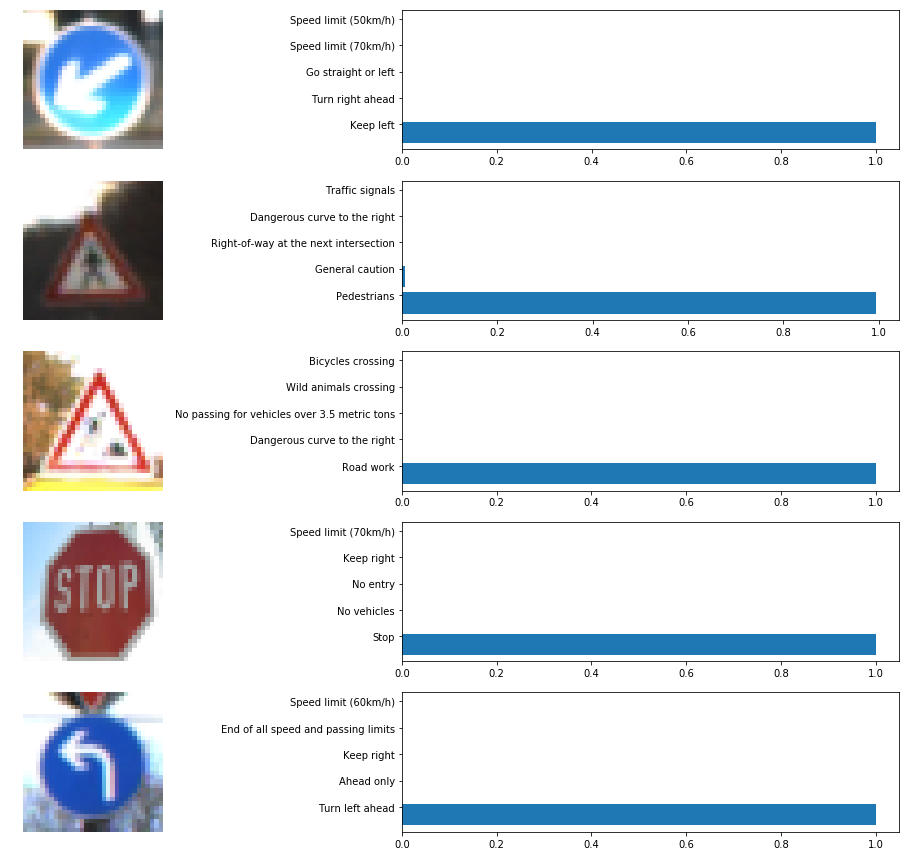

In [18]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (15.0, 12.0)
#image_indices = np.arange(0, len(images_resized))
for i in range(len(images)):
    with sns.axes_style("dark"):
        plt.subplot(len(images_resized), 2, (2*i)+1)
    plt.imshow(np.squeeze(images_resized[i]))
    plt.axis('off')
    plt.subplot(len(images_resized) ,2, (2*i)+2)
    plt.barh(np.arange(k), out_prob.values[i])
    plt.yticks(np.arange(k)+0.3, df.loc[out_prob.indices[i]].SignName)
    plt.tight_layout()

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
cor = 0
for i in range(len(out_prob.indices)):
    if df.loc[out_prob.indices[i][0]].SignName == image_names[i].replace("_"," "):
        cor += 1

my_test_accuracy = cor/len(image_names)*100
print("Test Accuracy = {:.3f}".format(my_test_accuracy))

Test Accuracy = 100.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")